# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [74]:
df = pd.read_csv('Dataset_Clustering.csv')
print(df.head())
print("\n")
print(df.info())

        price        cost  sales  profit_margin  inventory  \
0  218.543053  181.610932     40      16.899243        105   
1  477.821438  385.033827      7      19.418888        192   
2  379.397274  276.736765     32      27.058842         59   
3  319.396318  281.841334     48      11.758114         45   
4  120.208388   69.743681     19      41.981019         35   

   discount_percentage  delivery_days  category  material  color  location  \
0            27.796433              9         0         3      4         0   
1            26.943715              6         1         1      1         0   
2            21.948130              2         4         2      0         1   
3            11.009944              2         4         1      3         0   
4             3.183763              9         1         1      2         0   

   season  store_type  brand       revenue  Cluster  
0       1           0      0   3949.165238        0  
1       2           0      3  -3521.002258        

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [75]:
X = df.drop('Cluster', axis=1)
y = df['Cluster']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"Dimensi X_train: {X_train.shape}")
print(f"Dimensi X_test: {X_test.shape}")

Dimensi X_train: (1997, 15)
Dimensi X_test: (500, 15)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [76]:
clf = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=5, min_samples_leaf=2, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, random_state=42)

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [77]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("Akurasi:", accuracy_score(y_test, y_pred))
print(f"F1-Score: {f1:.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n")
print("Classification Report:\n", classification_report(y_test, y_pred))

Akurasi: 0.996
F1-Score: 0.9960
Confusion Matrix:
 [[175   0   0   0]
 [  0  69   0   2]
 [  0   0 104   0]
 [  0   0   0 150]]


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       175
           1       1.00      0.97      0.99        71
           2       1.00      1.00      1.00       104
           3       0.99      1.00      0.99       150

    accuracy                           1.00       500
   macro avg       1.00      0.99      0.99       500
weighted avg       1.00      1.00      1.00       500



In [78]:
# Inisialisasi model
model_rf = RandomForestClassifier(random_state=42)
model_knn = KNeighborsClassifier(n_neighbors=5)

In [79]:
# Latih model
model_rf.fit(X_train, y_train)
model_knn.fit(X_train, y_train)

# Prediksi
y_pred_rf = model_rf.predict(X_test)
y_pred_knn = model_knn.predict(X_test)

=== Random Forest ===
Akurasi: 0.998
F1-Score: 0.9979962300605546
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       175
           1       1.00      0.99      0.99        71
           2       1.00      1.00      1.00       104
           3       0.99      1.00      1.00       150

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



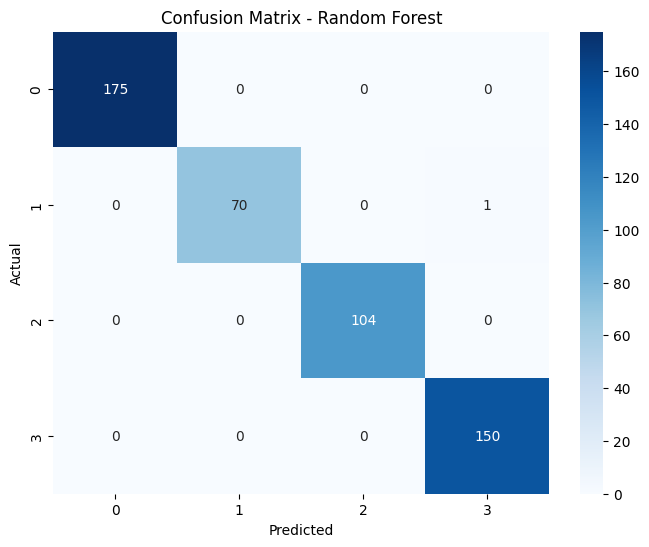

In [80]:
# Evaluasi Random Forest
acc_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

print("=== Random Forest ===")
print("Akurasi:", acc_rf)
print("F1-Score:", f1_rf)
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


=== K-Nearest Neighbors (KNN) ===
Akurasi: 0.994
F1-Score: 0.99400137078887
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       175
           1       1.00      1.00      1.00        71
           2       1.00      1.00      1.00       104
           3       0.99      0.99      0.99       150

    accuracy                           0.99       500
   macro avg       1.00      1.00      1.00       500
weighted avg       0.99      0.99      0.99       500



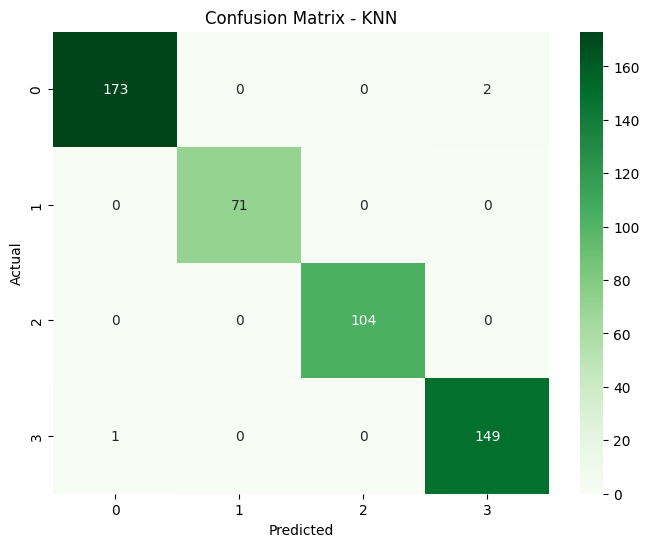

In [81]:
# Evaluasi K-Nearest Neighbors
acc_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

print("\n=== K-Nearest Neighbors (KNN) ===")
print("Akurasi:", acc_knn)
print("F1-Score:", f1_knn)
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [82]:
# Bandingkan hasil
print("\n=== Perbandingan Akurasi dan F1-Score ===")
print(f"Random Forest - Akurasi: {acc_rf:.4f}, F1: {f1_rf:.4f}")
print(f"KNN            - Akurasi: {acc_knn:.4f}, F1: {f1_knn:.4f}")

if acc_rf > acc_knn:
    print("➡ Random Forest memiliki performa lebih baik.")
elif acc_knn > acc_rf:
    print("➡ KNN memiliki performa lebih baik.")
else:
    print("➡ Kedua model memiliki akurasi yang setara.")


=== Perbandingan Akurasi dan F1-Score ===
Random Forest - Akurasi: 0.9980, F1: 0.9980
KNN            - Akurasi: 0.9940, F1: 0.9940
➡ Random Forest memiliki performa lebih baik.


Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [83]:
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [84]:
grid_search = GridSearchCV(RandomForestClassifier(random_state=42),
                           param_grid, cv=3, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [85]:
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)

acc_tuned = accuracy_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned, average='weighted')

print("Akurasi Setelah Tuning:", acc_tuned)
print("F1-Score Setelah Tuning:", f1_tuned)
print("\nClassification Report Setelah Tuning:\n", classification_report(y_test, y_pred_tuned))

Akurasi Setelah Tuning: 1.0
F1-Score Setelah Tuning: 1.0

Classification Report Setelah Tuning:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       175
           1       1.00      1.00      1.00        71
           2       1.00      1.00      1.00       104
           3       1.00      1.00      1.00       150

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



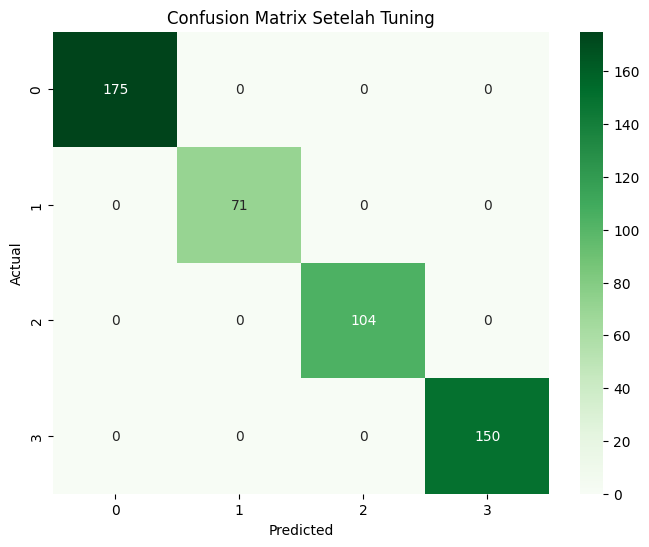

In [86]:
# Confusion Matrix setelah tuning
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_tuned), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix Setelah Tuning")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

In [87]:
# Bandingkan performa sebelum dan sesudah tuning
print(f"\nSebelum Tuning - Akurasi: {accuracy:.4f}, F1-Score: {f1:.4f}")
print(f"Sesudah Tuning - Akurasi: {acc_tuned:.4f}, F1-Score: {f1_tuned:.4f}")

if acc_tuned > accuracy:
    print("Tuning berhasil meningkatkan performa model.")
else:
    print("Tuning tidak memberikan peningkatan signifikan.")

# Insight manual (kamu bisa tambahkan berdasarkan hasilmu)
print("\nRekomendasi:")
print("- Cek precision & recall untuk masing-masing kelas.")
print("- Jika recall rendah: model sering salah prediksi kelas tersebut.")
print("- Coba algoritma lain jika performa belum memuaskan.")
print("- Tambah data atau fitur baru jika memungkinkan untuk meningkatkan akurasi.")


Sebelum Tuning - Akurasi: 0.9960, F1-Score: 0.9960
Sesudah Tuning - Akurasi: 1.0000, F1-Score: 1.0000
Tuning berhasil meningkatkan performa model.

Rekomendasi:
- Cek precision & recall untuk masing-masing kelas.
- Jika recall rendah: model sering salah prediksi kelas tersebut.
- Coba algoritma lain jika performa belum memuaskan.
- Tambah data atau fitur baru jika memungkinkan untuk meningkatkan akurasi.


# 1. Perbandingan Hasil Evaluasi Sebelum dan Sesudah Tuning

| Metrik       | Sebelum Tuning       | Sesudah Tuning       | Perubahan        |
|--------------|----------------------|-----------------------|------------------|
| Akurasi      | 0.996                | **1.000**             | 🔼 Meningkat     |
| F1-Score     | 0.996                | **1.000**             | 🔼 Meningkat     |
| Kesalahan    | 1 kesalahan klasifikasi (kelas 1 diprediksi kelas 3) | **0 kesalahan** | ✅ Disempurnakan |

**Kesimpulan:**
Tuning berhasil menghilangkan seluruh kesalahan klasifikasi, menghasilkan prediksi sempurna untuk semua kelas. Ini menunjukkan bahwa proses tuning sangat efektif dalam meningkatkan performa model Random Forest.

# 2. Identifikasi Kelemahan Model
## a. Precision dan Recall Rendah?
- Sebelum Tuning:
  - Recall kelas 1: 0.99 → sedikit lebih rendah dari sempurna.
- Sesudah Tuning:
  - Confusion matrix menunjukkan seluruh kelas diprediksi dengan benar, sehingga precision dan recall = 1.00 untuk semua kelas.

✅ Tidak ada kelemahan signifikan setelah tuning.

## b. Apakah Model Mengalami Overfitting?
- Ciri-ciri overfitting: Akurasi sangat tinggi pada data uji, tapi rendah pada data baru (real-world).
- Indikasi saat ini: Akurasi 100% mungkin menunjukkan overfitting jika:
  - Dataset terlalu kecil.
  - Tidak dilakukan validasi silang (cross-validation).
  - Hanya diuji pada subset data yang terlalu mirip dengan data latih.

**Kesimpulan:** Hasil sempurna perlu diuji lebih lanjut dengan:
- Cross-validation atau
- Data uji eksternal (belum pernah dilatih).

## 3. Rekomendasi Tindakan Lanjutan
Berikut beberapa langkah yang disarankan untuk menjaga atau meningkatkan performa:

✅ Evaluasi Lebih Lanjut:
- Gunakan k-fold cross-validation untuk memastikan generalisasi model.
- Uji dengan data baru/real-world jika tersedia.

✅ Cek Dataset:
Jika dataset terlalu kecil atau tidak seimbang, pertimbangkan untuk:
- Menambah data
- Menggunakan data augmentation (jika relevan)

✅ Eksperimen Model:
Meskipun Random Forest unggul, Anda bisa bandingkan dengan:
- XGBoost

- Gradient Boosting
- SVM (jika jumlah fitur relatif kecil)

✅ Perluas Fitur:
- Analisis fitur penting dari Random Forest (feature importance).
- Tambahkan fitur baru jika ada insight relevan dari domain data.